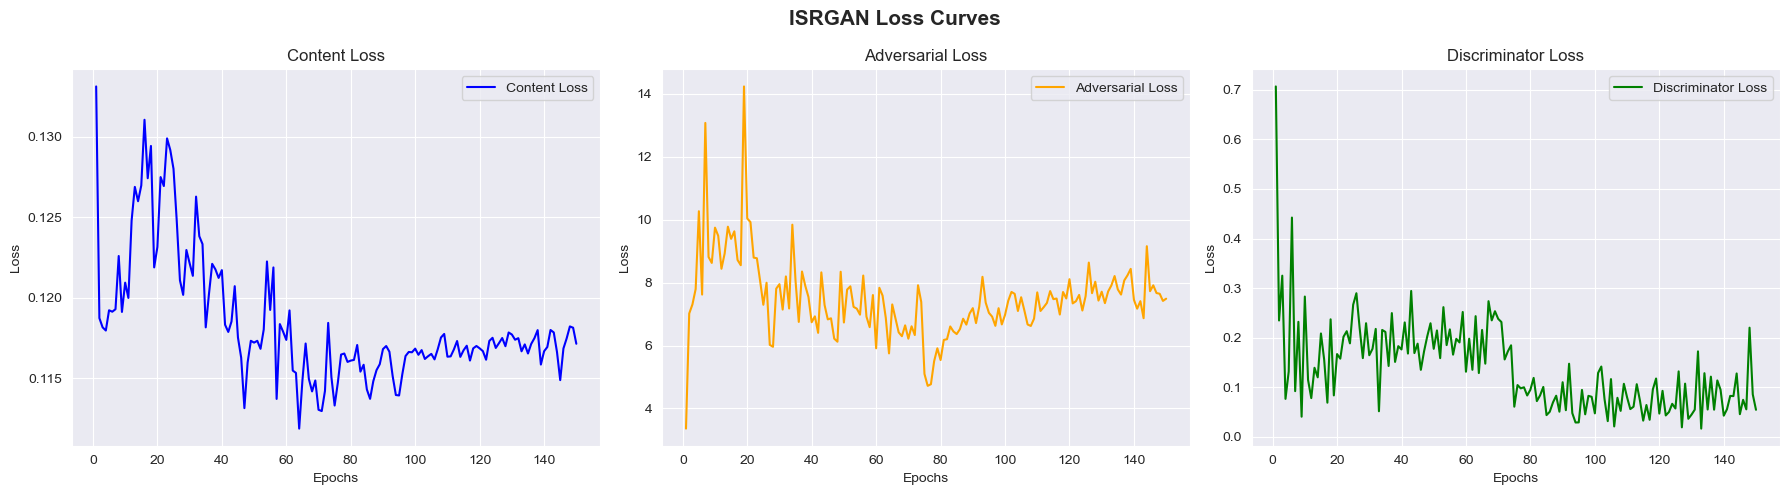

In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# 日志文件路径
log_file_path = './ISRGAN.log'

# 初始化存储损失值的列表
content_loss_values = []
adversarial_loss_values = []
discriminator_loss_values = []

# 从日志文件中提取损失值
with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(r'Content Loss: ([\d.]+), Adversarial Loss: ([\d.]+), Discriminator Loss: ([\d.]+)', line)
        if match:
            content_loss_values.append(float(match.group(1)))
            adversarial_loss_values.append(float(match.group(2)))
            discriminator_loss_values.append(float(match.group(3)))

# 创建损失曲线
epochs = list(range(1, len(content_loss_values) + 1))

# 创建包含三列的子图
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plt.suptitle('ISRGAN Loss Curves', fontsize=15, fontweight='bold')

# 1. Content Loss
axs[0].plot(epochs, content_loss_values, color='blue', label='Content Loss')
axs[0].set_title('Content Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# 2. Adversarial Loss
axs[1].plot(epochs, adversarial_loss_values, color='orange', label='Adversarial Loss')
axs[1].set_title('Adversarial Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# 3. Discriminator Loss
axs[2].plot(epochs, discriminator_loss_values, color='green', label='Discriminator Loss')
axs[2].set_title('Discriminator Loss')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].legend()
axs[2].grid(True)

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig('ISRGAN_Loss_Curve.png', dpi=1000)  # 保存损失曲线图
plt.show()  # 显示损失曲线图
